In [76]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

## 1. Data Preparation & EDA

In [77]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.feature_selection import RFE

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [78]:
# read the data
housing = pd.read_csv('train.csv')
housing.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [79]:
#checking shape of dataset
housing.shape

(1460, 81)

In [80]:
#checking info of dataset
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [81]:
#import pandas_profiling
#profile_report = pandas_profiling.ProfileReport(housing)
#profile_report

In [82]:
numeric_data = housing.select_dtypes(include = ['float64','int64'])
numeric_data.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,192,84,0,0,0,0,0,12,2008,250000


In [83]:
#checking percentage of null values in each column

df_missing=pd.DataFrame((round(100*(housing.isnull().sum()/len(housing.index)), 2)), columns=['missing'])
df_missing.sort_values(by=['missing'], ascending=False).head(20)

,missing
PoolQC,99.52
MiscFeature,96.30
Alley,93.77
Fence,80.75
FireplaceQu,47.26
LotFrontage,17.74
GarageYrBlt,5.55
GarageCond,5.55
GarageType,5.55
GarageFinish,5.55


In [84]:
#reading data dictionary

#f = open("/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt", "r")
#print(f.read())

In [85]:
#addressing NaN values based on data dictionary

# In column 'PoolQC' (Pool quality), NaN stands for No Pool
housing['PoolQC'] = housing['PoolQC'].fillna('No_Pool')

# In column 'MiscFeature' (Miscellaneous Features), NaN stands for None, meaning the house has no miscellaneous features.
housing['MiscFeature'] = housing['MiscFeature'].fillna('None')

# In column 'Alley', NaN stands for No Alley Access as per the data dictionary
housing['Alley'] = housing['Alley'].fillna('No_Alley_Access')

# In column 'Fence' (Fence Quality), NaN stands for No Fence as per the data dictionary
housing['Fence'] = housing['Fence'].fillna('No_Fence')

# In column 'FireplaceQu' (FireplaceQu Quality), NaN stands for No Fireplace as per the data dictionary
housing['FireplaceQu'] = housing['FireplaceQu'].fillna('No_Fireplace')

# LotFrontage stands for Linear feet of street connected to property, there is no explanation to impute this in data dictionary
# Let's consider imputing it with median of the lotFrontage of houses in the same neighbourhood

# Group data by neighborhood and impute missing value with median LotFrontage of all the neighborhood
housing["LotFrontage"] = housing.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

# In column 'GarageYrBlt' (Gargae Year Built), NaN stands for houses with no garage, let's impute with 0
housing['GarageYrBlt'] = housing['GarageYrBlt'].fillna(0)

# 'GarageType', 'GarageFinish', 'GarageQual' (Garage Quality) and 'GarageCond'(Garage Condition)
# Missing values signify no garage as per data dictionary.let's impute NaN values here with No Garage
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    housing[col] = housing[col].fillna('No_Garage')

#BsmtFinType1, BsmtFinType2 (Rating of basement finished area),
#BsmtExposure (Basement Exposure), BsmtQual(Basement Quality), BsmtCond (Basement Conidtion)
#These are all parameter related to basement. A NaN value probably signifies that the house does not have a basement.
for col in ('BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual','BsmtCond'):
    housing[col] = housing[col].fillna('No_Basement')
    
# In column 'MasVnrType' (Masonry veneer type), let's impute it with mode "None"
housing['MasVnrType'] = housing['MasVnrType'].fillna('None')

# In column 'MasVnrType' (Masonry veneer type), let's impute it with mode 0 corresponding to None
housing['MasVnrArea'] = housing['MasVnrArea'].fillna(0)

# In column 'Electrical' (Electrical system), let's impute NaN with "Other"
housing['Electrical'] = housing['Electrical'].fillna("Other")

In [86]:
#checking percentage of null values in each column

df_missing=pd.DataFrame((round(100*(housing.isnull().sum()/len(housing.index)), 2)), columns=['missing'])
df_missing.sort_values(by=['missing'], ascending=False).head(20)

,missing
Id,0.0
CentralAir,0.0
GarageYrBlt,0.0
GarageType,0.0
FireplaceQu,0.0
Fireplaces,0.0
Functional,0.0
TotRmsAbvGrd,0.0
KitchenQual,0.0
KitchenAbvGr,0.0


We do not have any more null values

## 2. EDA and Data Preparation

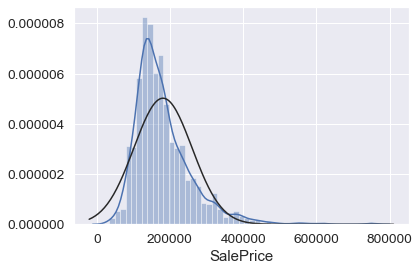

In [87]:
# Let us first visualize the spread of Target Variable 'Sale Price'
from scipy.stats import norm
sns.distplot(housing['SalePrice'], fit=norm)
plt.show()

The Sale Price distribution is not normally distributed, it is a little positively skewed with some houses having really high Sale Price

In [88]:
## "MSSubClass" is a numeric column but it should actually be categorical as per the data dictionary, so let's convert that.

housing=housing.replace({'MSSubClass' : { 20 : '1-STORY 1946 & NEWER ALL STYLES', 
                                          30:'1-STORY 1945 & OLDER',
                                          40:'1-STORY W/FINISHED ATTIC ALL AGES',
                                          45:'1-1/2 STORY - UNFINISHED ALL AGES',
                                          50:'1-1/2 STORY FINISHED ALL AGES',
                                          60:'2-STORY 1946 & NEWER',
                                          70:'2-STORY 1945 & OLDER',
                                          75:'2-1/2 STORY ALL AGES',
                                          80:'SPLIT OR MULTI-LEVEL',
                                          85:'SPLIT FOYER',
                                          90:'DUPLEX - ALL STYLES AND AGES',
                                         120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
                                         150:'1-1/2 STORY PUD - ALL AGES',
                                         160:'2-STORY PUD - 1946 & NEWER',
                                         180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
                                         190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'}})

In [89]:
numeric_data = housing.select_dtypes(include = ['float64','int64'])
numeric_data.columns

Index(['Id', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

"ID" column is like row number, it has all unique values and can be ignored for analysis.

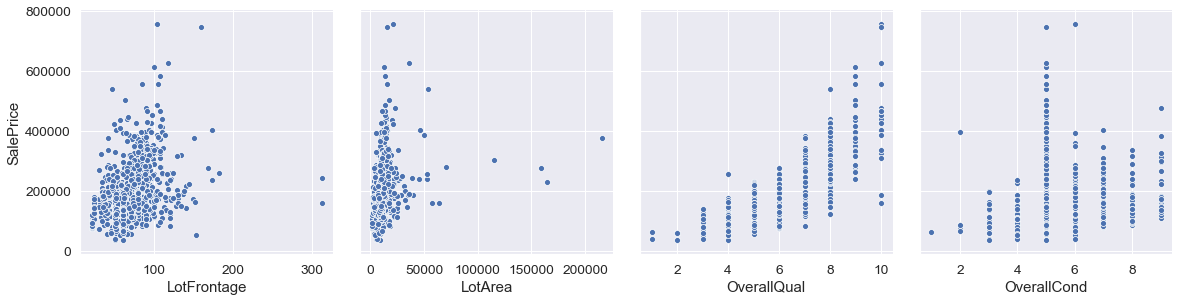

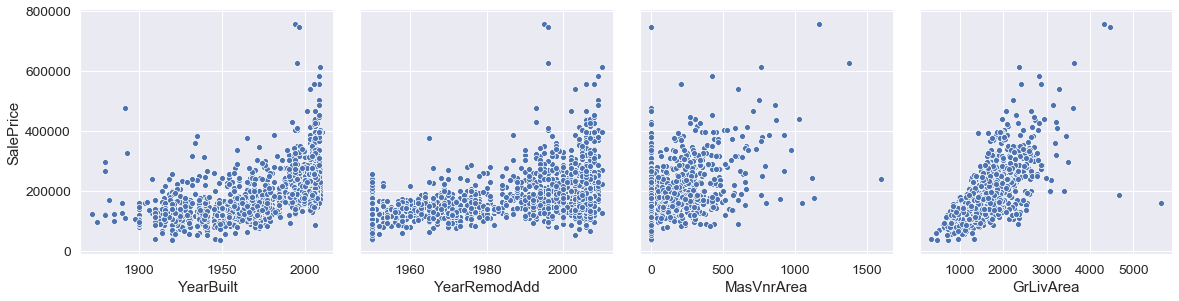

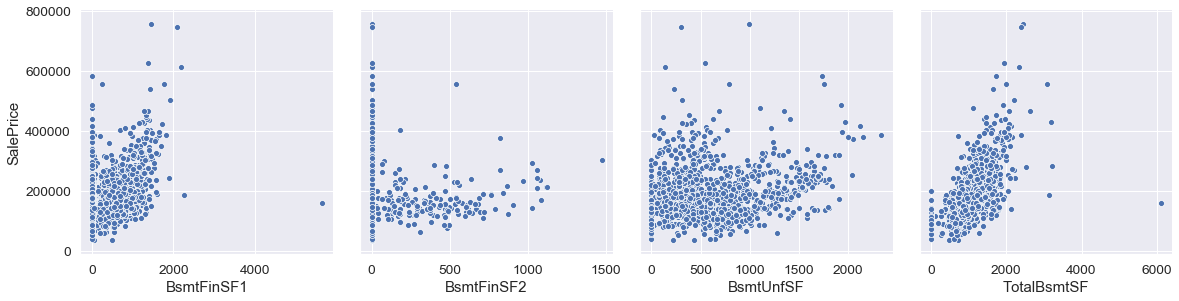

In [90]:
#function to plot scatter plot numeric variables with price

def pp(w,x,y,z):
    sns.pairplot(housing, x_vars=[w,x,y,z], y_vars='SalePrice',height=4, aspect=1, kind='scatter')
    plt.show()

pp('LotFrontage', 'LotArea', 'OverallQual','OverallCond')
pp('YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'GrLivArea')
pp('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF')

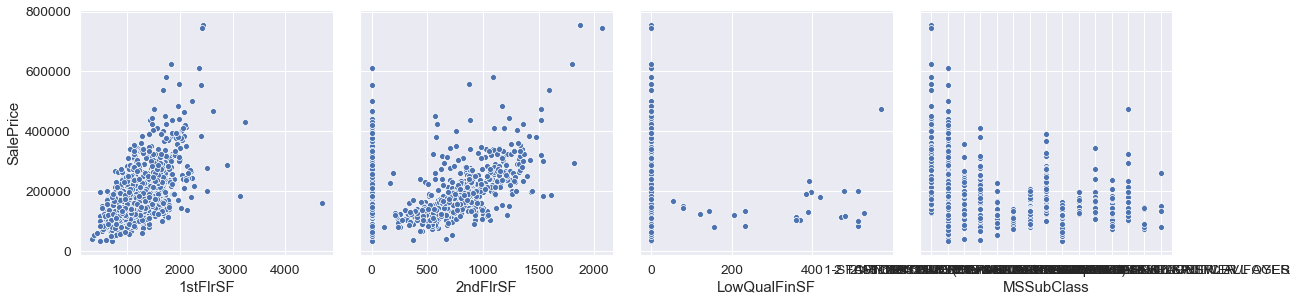

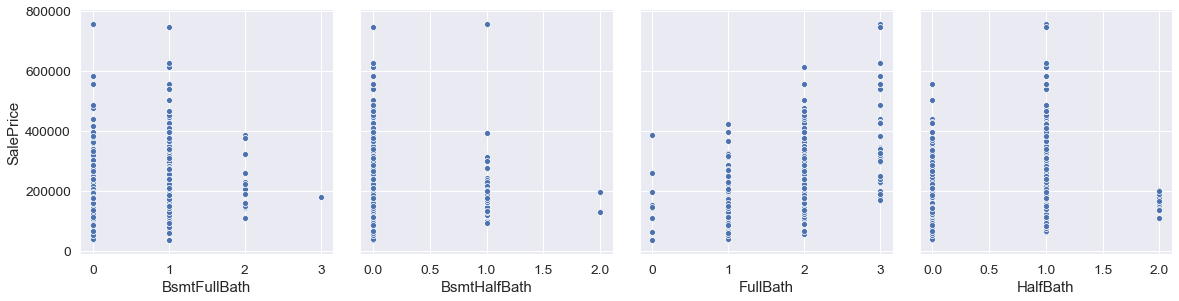

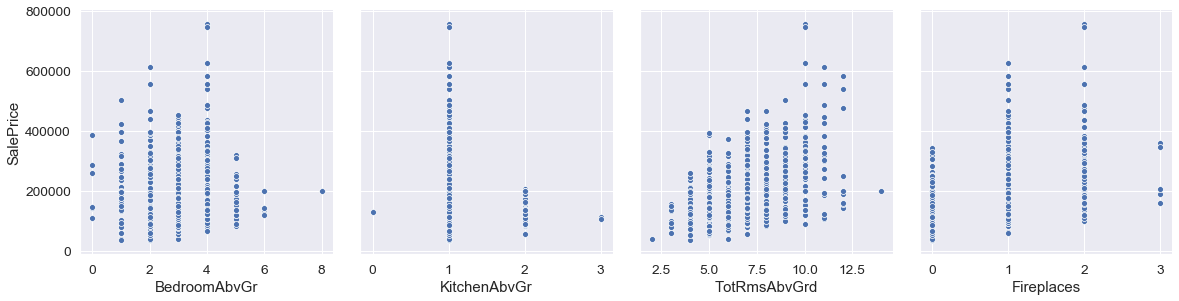

In [91]:
#function to plot scatter plot numeric variables with price

def pp(w,x,y,z):
    sns.pairplot(housing, x_vars=[w,x,y,z], y_vars='SalePrice',height=4, aspect=1, kind='scatter')
    plt.show()

pp('1stFlrSF', '2ndFlrSF','LowQualFinSF','MSSubClass')
pp('BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath')
pp('BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd','Fireplaces')

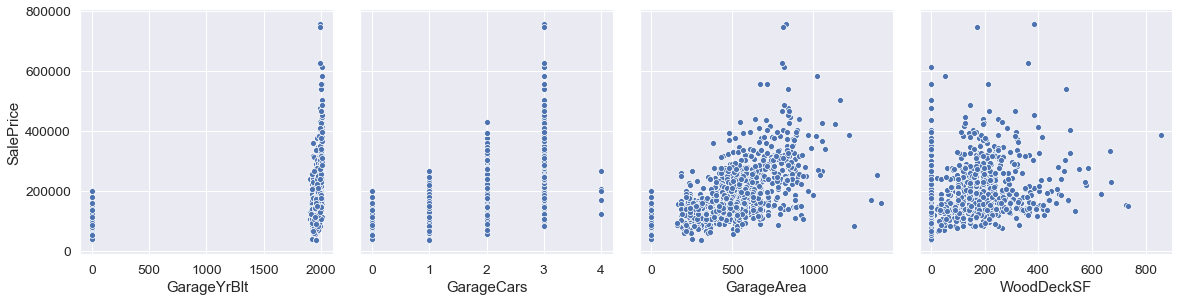

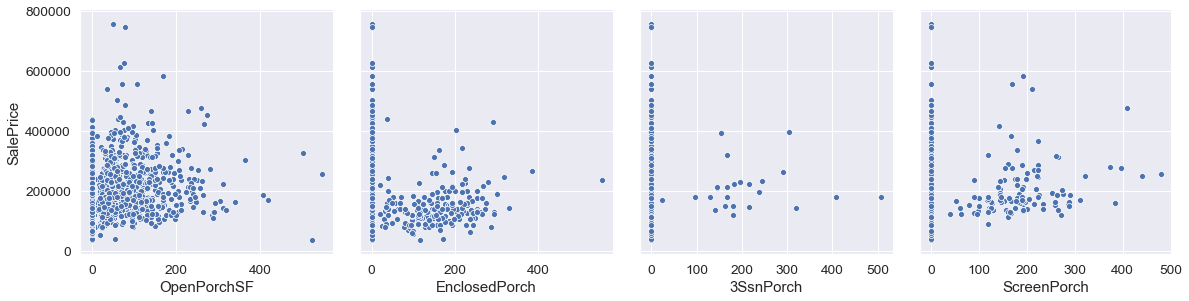

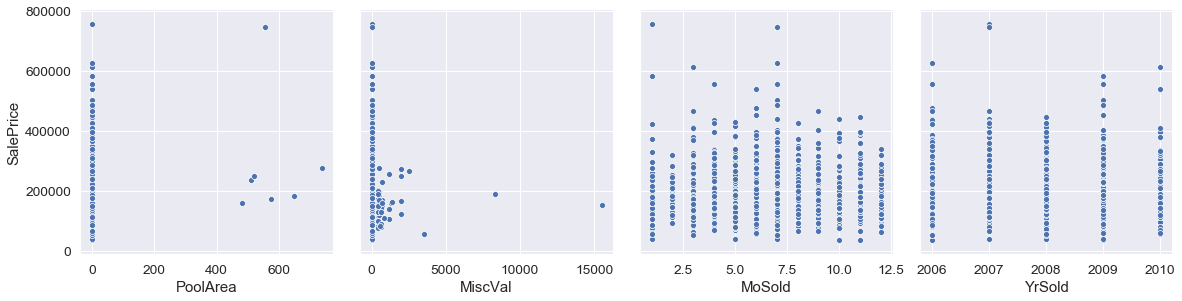

In [92]:
#function to plot scatter plot numeric variables with price

def pp(w,x,y,z):
    sns.pairplot(housing, x_vars=[w,x,y,z], y_vars='SalePrice',height=4, aspect=1, kind='scatter')
    plt.show()

pp('GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF')
pp('OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch')
pp('PoolArea','MiscVal', 'MoSold', 'YrSold')

In [93]:
# label encode ordinal features where there is order in categories

housing = housing.replace({  "Alley":        {"No_Alley_Access" : 0, "Grvl" : 1, "Pave" : 2},
                       "BsmtCond":     {"No_Basement" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "BsmtExposure": {"No_Basement" : 0, "No" : 2, "Mn" : 2, "Av": 3, 
                                        "Gd" : 4},
                       "BsmtFinType1": {"No_Basement" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, 
                                        "BLQ" : 4, "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2": {"No_Basement" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, 
                                        "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual":     {"No_Basement" : 0, "Po" : 1, "Fa" : 2, "TA": 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "CentralAir":   {"None" : 0, "N" : 1, "Y" : 2},
                       "ExterCond":    {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, 
                                        "Gd": 4, "Ex" : 5},
                       "ExterQual":    {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, 
                                        "Gd": 4, "Ex" : 5},
                       "Fence":        {"No_Fence" : 0, "MnWw" : 1, "GdWo" : 2, "MnPrv": 3, 
                                        "GdPrv" : 4},
                       "FireplaceQu":  {"No_Fireplace" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "Functional":   {"None" : 0, "Sal" : 1, "Sev" : 2, "Maj2" : 3, 
                                        "Maj1" : 4, "Mod": 5, "Min2" : 6, "Min1" : 7, 
                                        "Typ" : 8},
                       "GarageCond":   {"No_Garage" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "GarageQual":   {"No_Garage" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "GarageFinish": {"No_Garage" : 0, "Unf" : 1, "RFn" : 2, "Fin" : 3},
                       "HeatingQC":    {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "KitchenQual":  {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "LandContour":  {"None" : 0, "Low" : 1, "HLS" : 2, "Bnk" : 3, 
                                        "Lvl" : 4},
                       "LandSlope":    {"None" : 0, "Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape":     {"None" : 0, "IR3" : 1, "IR2" : 2, "IR1" : 3, 
                                        "Reg" : 4},
                       "PavedDrive":   {"None" : 0, "N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC":       {"No_Pool" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, 
                                        "Ex" : 4},
                       "Street":       {"None" : 0, "Grvl" : 1, "Pave" : 2},
                       "Utilities":    {"None" : 0, "ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, 
                                        "AllPub" : 4}}
                     )

housing.BsmtCond = housing.BsmtCond.astype(int)

In [94]:
## FUNCTION TO PLOT CHARTS

def plot_charts(var1,var2,label_rotation):
    plt.figure(figsize=(12, 10))   
    plt.subplot(2,2,1)
    plt.title('Count Plot of '+ var1)
    plt1=sns.countplot(housing[var1], palette=("husl"))
    plt1.set(xlabel = '%s'%var1, ylabel='Count of'+ '%s'%var1)
    if(label_rotation):
        plt1.set_xticklabels(plt1.get_xticklabels(),rotation=90)
        
    plt.subplot(2,2,2)
    plt.title(var1+' vs Price')
    plt2=sns.boxplot(x=housing[var1], y=housing.SalePrice, palette=("husl"))
    if(label_rotation):
        plt2.set_xticklabels(plt2.get_xticklabels(),rotation=90)
    
    plt.subplot(2,2,3)
    plt.title('Count Plot of '+ var2)
    plt3=sns.countplot(housing[var2], palette=("husl"))
    plt3.set(xlabel = '%s'%var2, ylabel='Count of'+ '%s'%var2)
    if(label_rotation):
        plt3.set_xticklabels(plt3.get_xticklabels(),rotation=90)
    
    plt.subplot(2,2,4)
    plt.title(var2+' vs Price')
    plt4=sns.boxplot(x=housing[var2], y=housing.SalePrice, palette=("husl"))
    if(label_rotation):
        plt4.set_xticklabels(plt4.get_xticklabels(),rotation=90)
        
    plt.show()

In [95]:
categorical_features=housing.select_dtypes(include='object')
categorical_features.columns

Index(['MSSubClass', 'MSZoning', 'LotConfig', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating',
       'Electrical', 'GarageType', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

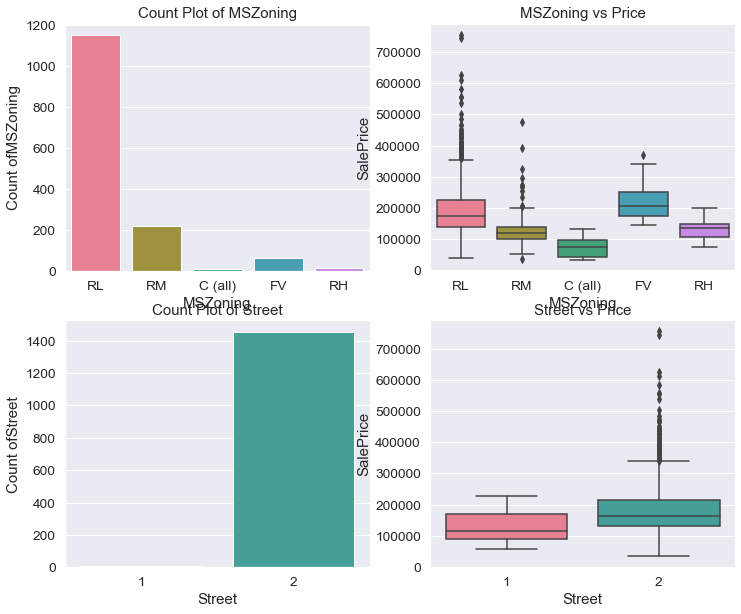

In [96]:
plot_charts('MSZoning', 'Street', label_rotation=False)

**Observation:** 
- MsZoning identifies the general zoning classification of the sale. 
- We see that the prices vary a lot for different values and most of the records are for "RL" Residential Low Density properties.
- Street identifies the Type of road access to property
- While we see that houses with Paved roads have higher Sale Price compared to Gravel, we must also note that this is a highly imbalanced variable with most records as "Pave"

In [97]:
housing['Street'].value_counts(dropna=False)

2    1454
1       6
Name: Street, dtype: int64

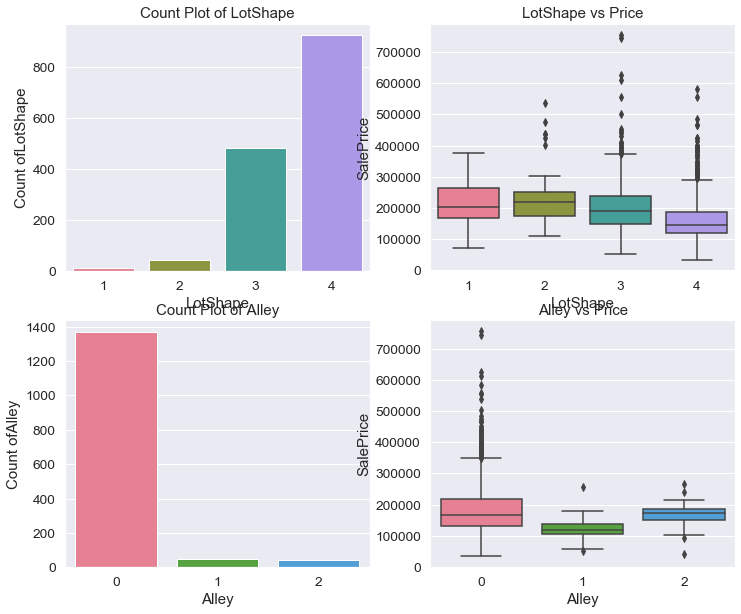

In [98]:
plot_charts('LotShape','Alley',label_rotation=False)

In [99]:
housing['Street'].value_counts(dropna=False)

2    1454
1       6
Name: Street, dtype: int64

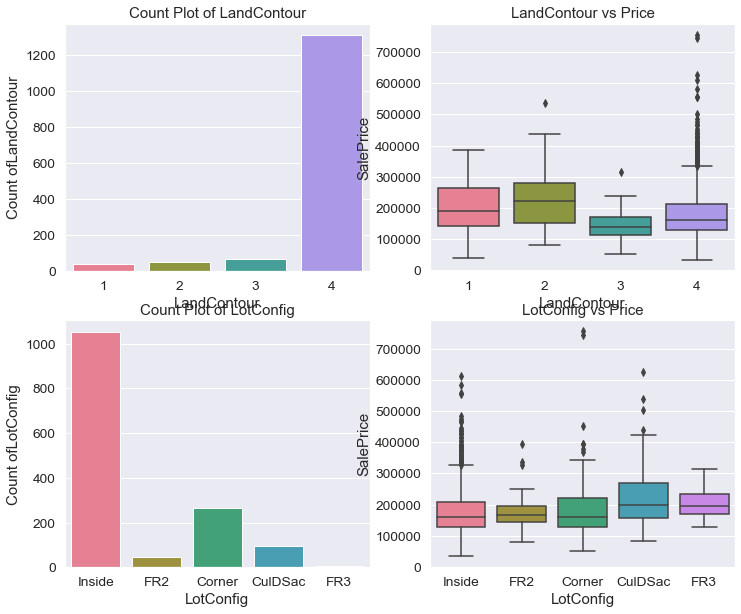

In [100]:
plot_charts('LandContour','LotConfig',label_rotation=False)

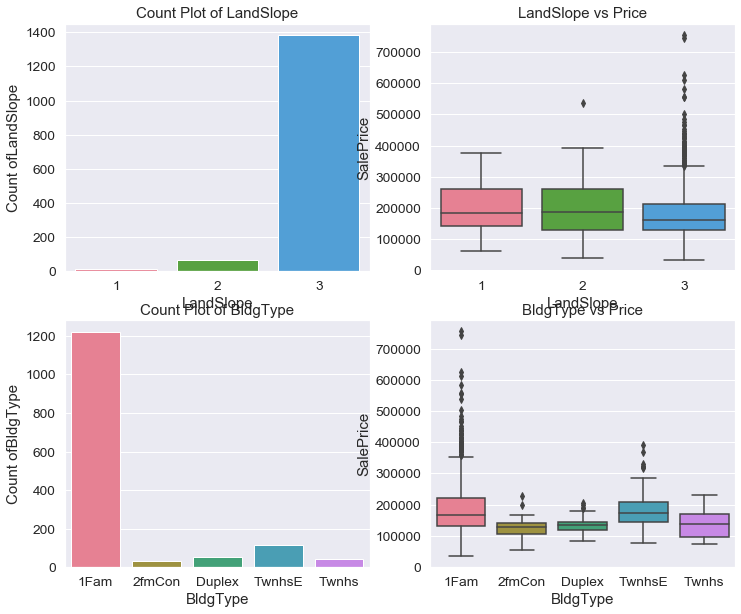

In [101]:
plot_charts('LandSlope','BldgType',label_rotation=False)

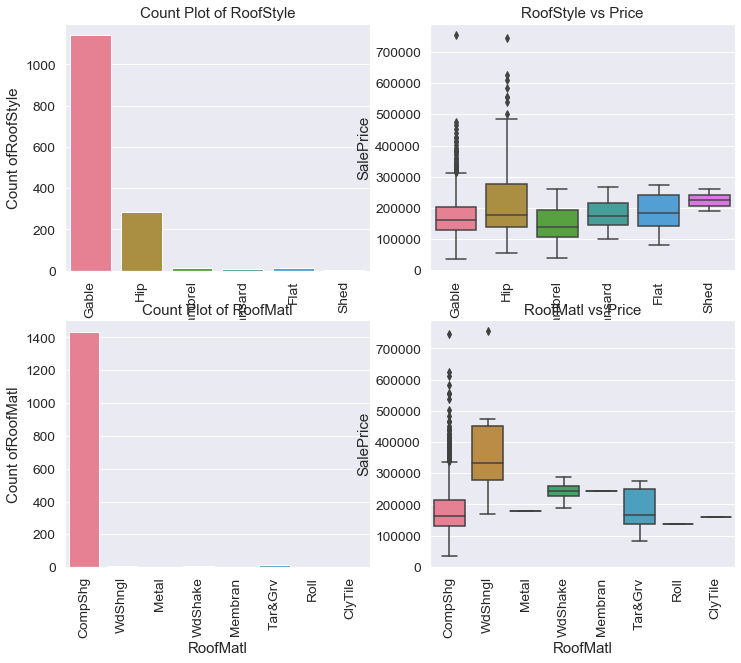

In [102]:
plot_charts('RoofStyle', 'RoofMatl',label_rotation=True)

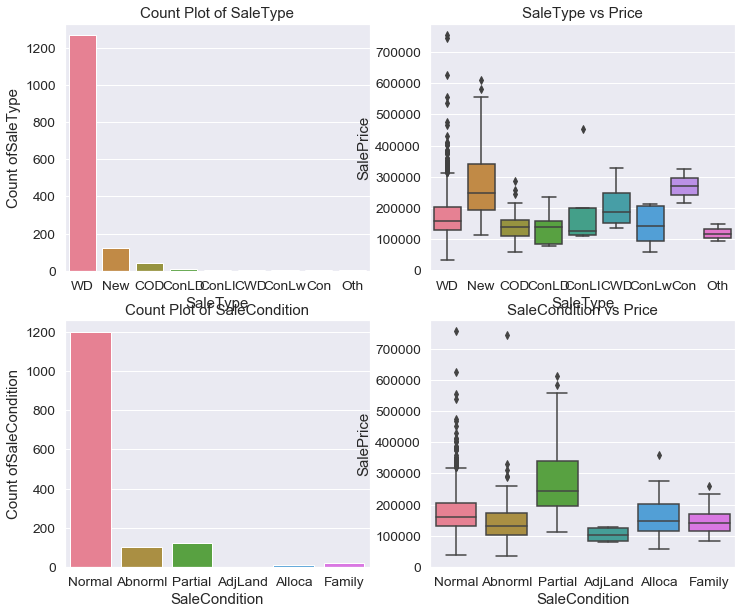

In [103]:
plot_charts('SaleType', 'SaleCondition',label_rotation=False)

In [104]:
# DATA PREPARATION

In [105]:
#changing months to categorical
import calendar

housing['MonthSold'] = housing['MoSold'].apply(lambda x: calendar.month_name[x])
housing=housing.drop(['MoSold'], axis=1)

In [106]:
#changing data type of Gararge yr built to int from float
housing['GarageYrBlt'] = housing['GarageYrBlt'].astype(int)

In [107]:
#DERIVED VARIABLES which might make more sense than year

housing['Age'] = housing['YrSold'] - housing['YearBuilt']
housing['Remod_Age'] = housing['YrSold'] - housing['YearRemodAdd']
housing['Garage_Age'] = housing['YrSold'] - housing['GarageYrBlt']
housing.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],1, inplace = True)

In [108]:
numeric_data = housing.select_dtypes(include = ['float64','int64'])
numeric_data.columns

Index(['Id', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape',
       'LandContour', 'Utilities', 'LandSlope', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscVal', 'SalePrice',
       'Age', 'Remod_Age', 'Garage_Age'],
      dtype='object')

In [109]:
#OUTLIER TREATMENT

def remove_outliers(dtf, numl_list):
    for j in numl_list:
        Q1 = dtf[j].quantile(0.05)
        Q3 = dtf[j].quantile(0.95)
        IQR = Q3 - Q1       
        dtf = dtf[(dtf[j] >= Q1-2.5*IQR) & (dtf[j] <= Q3+2.5*IQR)]
    return dtf

In [110]:
numeric_data_list=list(numeric_data.columns)

In [111]:
housing=remove_outliers(housing,numeric_data_list)

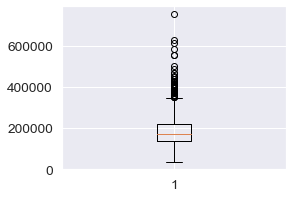

In [112]:
# Outlier treatment on the variable Sale Price
plt.figure(figsize=(4,3))
plt.boxplot(housing['SalePrice'])
plt.show()

In [113]:
housing.shape

(1158, 80)

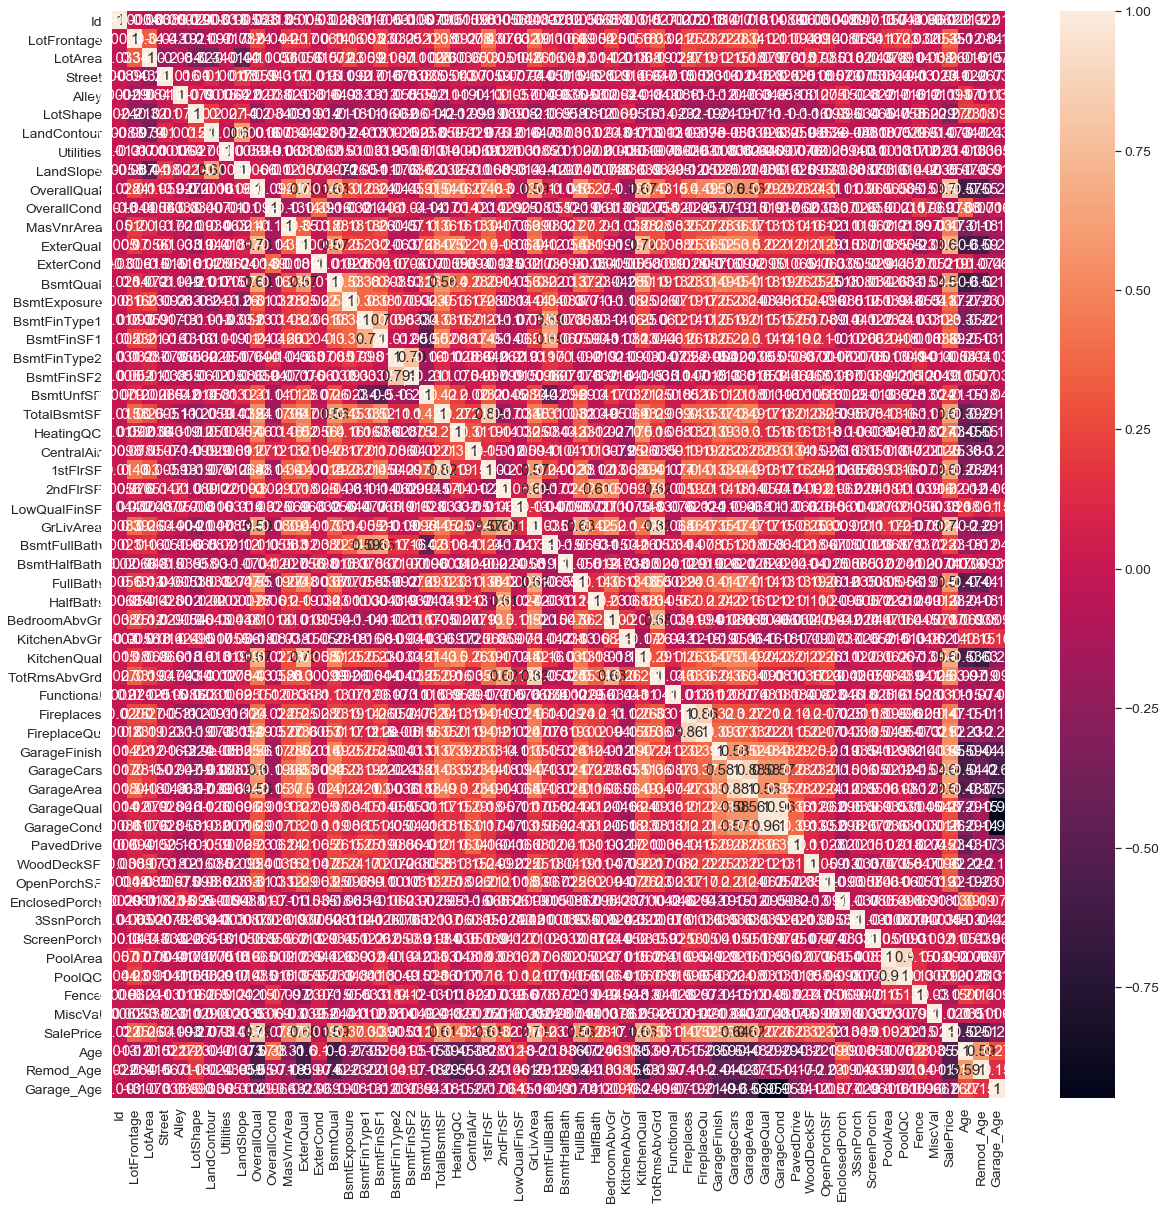

In [114]:
cor = numeric_data.corr()
plt.figure(figsize=(20,20))

sns.heatmap(cor, annot=True)
plt.show()

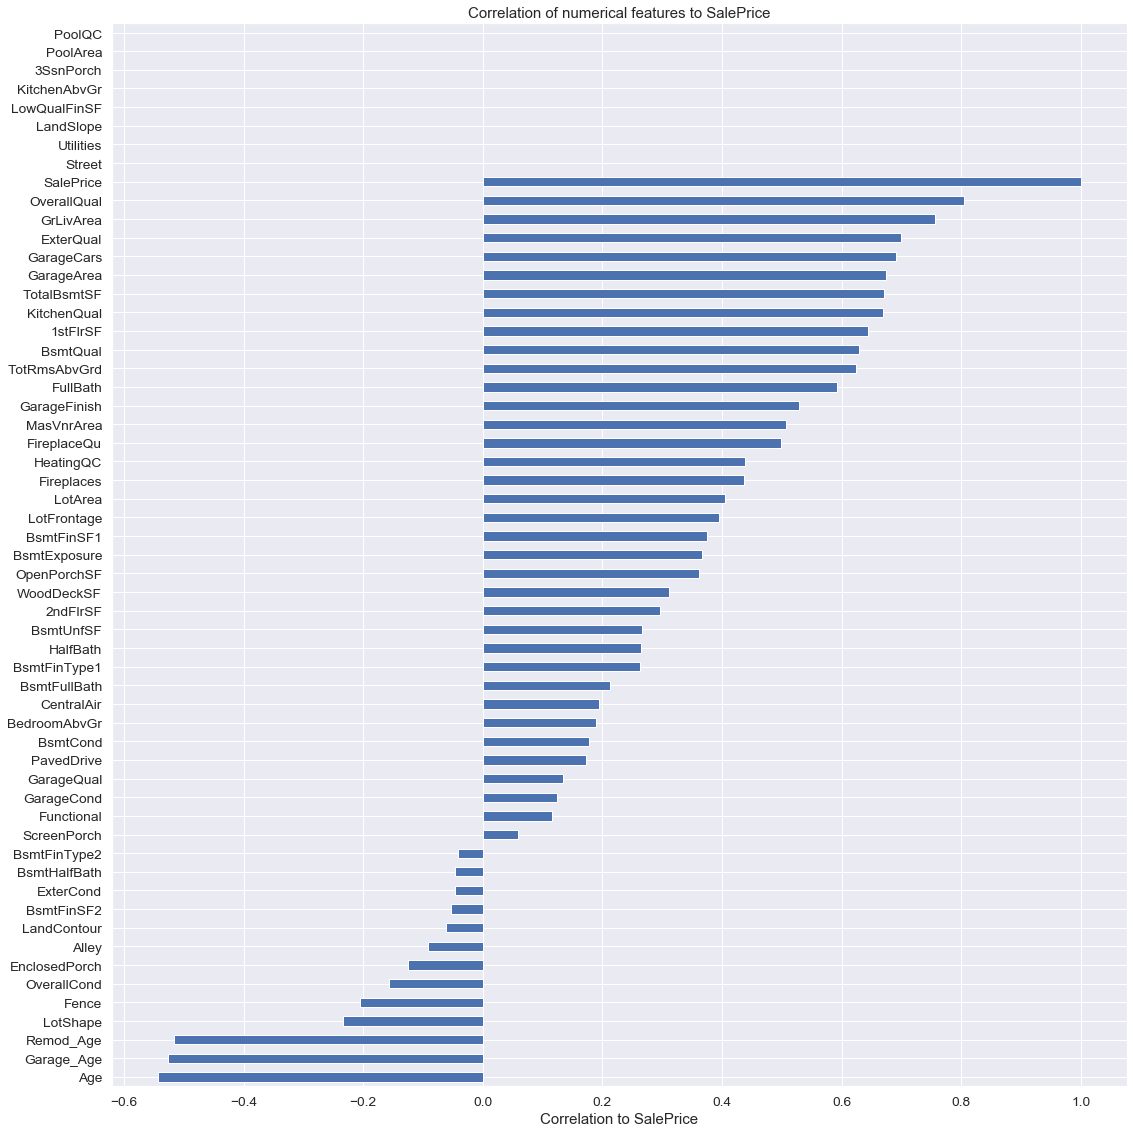

In [115]:
# we drop Id (not relevant)
corr = housing.drop(["Id"], axis=1).select_dtypes(include="number").corr()

plt.figure(figsize=(16,16));
corr["SalePrice"].sort_values(ascending=True)[:-1].plot(kind="barh")
plt.title("Correlation of numerical features to SalePrice")
plt.xlabel("Correlation to SalePrice")
plt.tight_layout()
plt.show()

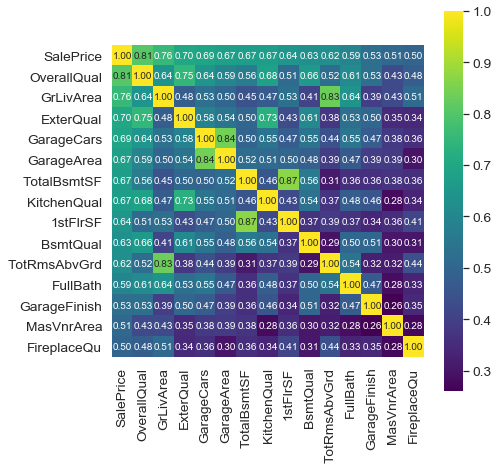

In [116]:
#saleprice correlation matrix
plt.figure(figsize=(7,7))
k = 15 #number of variables for heatmap
cols = corr.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(housing[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, cmap='viridis',yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [117]:
#converting binary variables to numeric by mapping to 0 and 1

housing['Street'] = housing['Street'].apply(lambda x: 1 if x == 'Pave' else 0 )
housing['CentralAir'] = housing['CentralAir'].apply(lambda x : 1 if x == 'Y' else 0)

In [118]:
#converting binary variables to numeric by mapping to 0 and 1

housing['PavedDrive'] = housing['PavedDrive'].apply(lambda x : 1 if x == 'Y' else 0)

In [119]:
df = housing.drop(['Id'],axis=1)
housing_categorical = df.select_dtypes(include=['object'])
housing_categorical.head()

,MSSubClass,MSZoning,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,...,Exterior2nd,MasVnrType,Foundation,Heating,Electrical,GarageType,MiscFeature,SaleType,SaleCondition,MonthSold
0,2-STORY 1946 & NEWER,RL,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,...,VinylSd,BrkFace,PConc,GasA,SBrkr,Attchd,None,WD,Normal,February
1,1-STORY 1946 & NEWER ALL STYLES,RL,FR2,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,...,MetalSd,None,CBlock,GasA,SBrkr,Attchd,None,WD,Normal,May
2,2-STORY 1946 & NEWER,RL,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,...,VinylSd,BrkFace,PConc,GasA,SBrkr,Attchd,None,WD,Normal,September
3,2-STORY 1945 & OLDER,RL,Corner,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,...,Wd Shng,None,BrkTil,GasA,SBrkr,Detchd,None,WD,Abnorml,February
4,2-STORY 1946 & NEWER,RL,FR2,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,...,VinylSd,BrkFace,PConc,GasA,SBrkr,Attchd,None,WD,Normal,December


In [120]:
# convert into dummies
housing_dummies = pd.get_dummies(housing_categorical, drop_first=True)
housing_dummies.head()

,MSSubClass_1-1/2 STORY FINISHED ALL AGES,MSSubClass_1-STORY 1945 & OLDER,MSSubClass_1-STORY 1946 & NEWER ALL STYLES,MSSubClass_1-STORY PUD (Planned Unit Development) - 1946 & NEWER,MSSubClass_1-STORY W/FINISHED ATTIC ALL AGES,MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES,MSSubClass_2-1/2 STORY ALL AGES,MSSubClass_2-STORY 1945 & OLDER,MSSubClass_2-STORY 1946 & NEWER,MSSubClass_2-STORY PUD - 1946 & NEWER,...,MonthSold_December,MonthSold_February,MonthSold_January,MonthSold_July,MonthSold_June,MonthSold_March,MonthSold_May,MonthSold_November,MonthSold_October,MonthSold_September
0,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [121]:
#dropping original categorical columns
df = df.drop(list(housing_categorical.columns), axis=1)

In [122]:
#concatenating dummy columns to original dataframe
df = pd.concat([df,housing_dummies], axis=1)

In [123]:
df.shape

(1158, 208)

In [124]:
#train_test_split
df_train,df_test=train_test_split(df,train_size=0.70, random_state=100)
df_train.shape

(810, 208)

In [125]:
y_train = np.log(df_train.SalePrice)
X_train = df_train.drop("SalePrice",1)

y_test= np.log(df_test.SalePrice)
X_test = df_test.drop("SalePrice",1)

In [126]:
num_vars=X_train.select_dtypes(include=['int64','float64']).columns

In [127]:
num_vars

Index(['LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LandSlope', 'OverallQual', 'OverallCond', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'PoolQC', 'Fence', 'MiscVal', 'Age', 'Remod_Age', 'Garage_Age'],
      dtype='object')

In [128]:
scaler = StandardScaler()
X_train[num_vars] = scaler.fit_transform(X_train[num_vars])
X_test[num_vars] = scaler.transform(X_test[num_vars])

In [136]:
y_train

1374    12.429216
116     11.842229
1093    11.891362
1274    11.842229
1043    12.477168
          ...    
1019    12.271345
65      12.666657
437     11.686879
100     12.230765
1006    12.004568
Name: SalePrice, Length: 810, dtype: float64

In [129]:
#linear regression model

In [130]:
lm=LinearRegression()
lm.fit(X_train,y_train)

rfe = RFE(lm,20)
rfe=rfe.fit(X_train,y_train)

col=X_train.columns[rfe.support_]
col

Index(['1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'KitchenAbvGr',
       'PavedDrive', '3SsnPorch', 'PoolArea', 'PoolQC', 'MiscVal',
       'MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES',
       'Condition2_Norm', 'Condition2_PosA', 'Condition2_RRNn',
       'BldgType_2fmCon', 'Exterior1st_BrkComm', 'Exterior1st_CemntBd',
       'Exterior2nd_CmentBd', 'Exterior2nd_Other', 'Exterior2nd_VinylSd'],
      dtype='object')

In [131]:
X_train_new=X_train[col]

X_train_new = sm.add_constant(X_train_new)

#create first model
lr=sm.OLS(y_train,X_train_new)

#fit the model
lr_model=lr.fit()

lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.702
Method:                 Least Squares   F-statistic:                     174.4
Date:                Fri, 16 Oct 2020   Prob (F-statistic):          1.10e-203
Time:                        22:05:51   Log-Likelihood:                 170.76
No. Observations:                 810   AIC:                            -317.5
Df Residuals:                     798   BIC:                            -261.2
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   11.4247      0.118     96.456      0.000      11.192      11.657
1stFlrSF                                                 0.1463      0.005     27.288      0.000       0.136       0.157
2ndFlrSF                                                 0.0394      0.005      8.255      0.000       0.030       0.049
LowQualFinSF                                          1.579e-14   3.68e-16     42.848      0.000    1.51e-14    1.65e-14
GrLivArea                                                0.1476      0.004     34.918      0.000       0.139       0.156
KitchenAbvGr                                         -3.354e-15   3.76e-16     -8.932      0.000   -4.09e-15   -2.62e-15
PavedDrive                                            1.801e-15   1.63e-16     11.032      0.000    1.48e-15    2.12e-15
3SsnPorch                                             3.932e-16   3.72e-17     10.568      0.000     3.2e-16    4.66e-16
PoolArea                                             -6.604e-17   1.53e-17     -4.318      0.000   -9.61e-17    -3.6e-17
PoolQC                                               -1.225e-16   1.05e-16     -1.165      0.244   -3.29e-16    8.38e-17
MiscVal                                              -3.446e-16   6.64e-17     -5.192      0.000   -4.75e-16   -2.14e-16
MSSubClass_2 FAMILY CONVERSION - ALL STYLES AND AGES    -0.0259      0.041     -0.637      0.525      -0.106       0.054
Condition2_Norm                                          0.5541      0.119      4.674      0.000       0.321       0.787
Condition2_PosA                                          0.6397      0.230      2.783      0.006       0.188       1.091
Condition2_RRNn                                          0.4843      0.185      2.620      0.009       0.121       0.847
BldgType_2fmCon                                         -0.0259      0.041     -0.637      0.525      -0.106       0.054
Exterior1st_BrkComm                                     -0.9282      0.198     -4.694      0.000      -1.316      -0.540
Exterior1st_CemntBd                                     -0.2780      0.202     -1.378      0.169      -0.674       0.118
Exterior2nd_CmentBd                                      0.3911      0.198      1.971      0.049       0.002       0.781
Exterior2nd_Other                                        0.3553      0.198      1.793      0.073      -0.034       0.744
Exterior2nd_VinylSd                                      0.1927      0.015     12.997      0.000       0.164       0.222
==============================================================================
Omnibus:                      153.999   Durbin-Watson:                   2.039
Prob(Omnibus):       

In [132]:
#RIDGE REGULARIZATION

# list of alphas to tune


params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 26 candidates, totalling 130 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 130 out of 130 | elapsed:    2.0s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [134]:
print(model_cv.best_params_)
print(model_cv.best_score_)

{'alpha': 8.0}
-0.07819867917006823


In [135]:
X_train

,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LandSlope,OverallQual,OverallCond,...,MonthSold_December,MonthSold_February,MonthSold_January,MonthSold_July,MonthSold_June,MonthSold_March,MonthSold_May,MonthSold_November,MonthSold_October,MonthSold_September
1374,0.739454,0.199541,0.0,-0.224583,0.696620,0.213495,0.0,0.0,0.582992,-0.536049,...,0,0,0,1,0,0,0,0,0,0
116,0.048871,0.430423,0.0,-0.224583,0.696620,0.213495,0.0,0.0,-0.932974,-0.536049,...,0,0,0,0,0,0,0,0,0,1
1093,0.048871,-0.125465,0.0,-0.224583,0.696620,0.213495,0.0,0.0,-0.932974,2.229552,...,0,0,0,0,0,0,0,0,1,0
1274,-0.839022,-1.026627,0.0,-0.224583,0.696620,0.213495,0.0,0.0,-0.932974,0.385818,...,0,0,0,0,0,0,0,1,0,0
1043,0.788781,0.482377,0.0,-0.224583,0.696620,0.213495,0.0,0.0,0.582992,-0.536049,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1019,-1.332295,-1.573895,0.0,-0.224583,0.696620,0.213495,0.0,0.0,0.582992,-0.536049,...,0,0,0,0,0,0,0,0,0,0
65,0.295507,-0.041359,0.0,-0.224583,0.696620,0.213495,0.0,0.0,1.340975,-0.536049,...,0,0,0,0,0,0,0,0,1,0
437,-0.987004,-0.877987,0.0,-0.224583,0.696620,0.213495,0.0,0.0,-0.174991,1.307685,...,0,0,1,0,0,0,0,0,0,0
100,0.492817,0.194415,0.0,-0.224583,-1.018462,0.213495,0.0,0.0,-0.174991,1.307685,...,0,1,0,0,0,0,0,0,0,0


In [60]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=100]
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.031200,4.340238e-02,0.001599,0.000489,0.0001,{'alpha': 0.0001},-0.083082,-0.084671,-0.082638,-0.086941,...,-0.082924,0.003196,26,-0.056341,-0.053264,-0.050548,-0.054868,-0.052142,-0.053433,0.002026
1,0.009406,4.853614e-04,0.001794,0.000398,0.001,{'alpha': 0.001},-0.082932,-0.084566,-0.082580,-0.086951,...,-0.082861,0.003190,25,-0.056354,-0.053282,-0.050557,-0.054872,-0.052173,-0.053448,0.002024
2,0.009614,1.037322e-03,0.001986,0.000026,0.01,{'alpha': 0.01},-0.081780,-0.083794,-0.082097,-0.087048,...,-0.082419,0.003138,24,-0.056467,-0.053433,-0.050644,-0.054920,-0.052401,-0.053573,0.002008
3,0.008399,4.960911e-04,0.001419,0.000497,0.05,{'alpha': 0.05},-0.079795,-0.082146,-0.081071,-0.087485,...,-0.081625,0.003294,23,-0.056796,-0.053981,-0.050976,-0.055150,-0.052973,-0.053975,0.001966
4,0.008629,4.709819e-04,0.001576,0.000492,0.1,{'alpha': 0.1},-0.079014,-0.081054,-0.080554,-0.087861,...,-0.081256,0.003497,21,-0.057102,-0.054591,-0.051369,-0.055403,-0.053561,-0.054405,0.001910
5,0.008403,4.876232e-04,0.001596,0.000488,0.2,{'alpha': 0.2},-0.078673,-0.079781,-0.079938,-0.088333,...,-0.080972,0.003741,20,-0.057580,-0.055486,-0.051936,-0.055848,-0.054485,-0.055067,0.001857
6,0.008612,8.179454e-04,0.001799,0.000399,0.3,{'alpha': 0.3},-0.078470,-0.079020,-0.079531,-0.088651,...,-0.080753,0.003979,19,-0.058003,-0.056141,-0.052470,-0.056242,-0.055270,-0.055625,0.001810
7,0.008404,4.952798e-04,0.001797,0.000399,0.4,{'alpha': 0.4},-0.078241,-0.078923,-0.079300,-0.088848,...,-0.080640,0.004134,18,-0.058470,-0.056651,-0.052946,-0.056554,-0.056047,-0.056134,0.001793
8,0.008419,4.909507e-04,0.001813,0.000407,0.5,{'alpha': 0.5},-0.078073,-0.078849,-0.079165,-0.088972,...,-0.080529,0.004258,17,-0.058891,-0.057071,-0.053346,-0.056815,-0.056712,-0.056567,0.001795
9,0.008828,3.979228e-04,0.001793,0.000423,0.6,{'alpha': 0.6},-0.077998,-0.078783,-0.079079,-0.089044,...,-0.080432,0.004353,16,-0.059247,-0.057423,-0.053683,-0.057044,-0.057291,-0.056938,0.001805


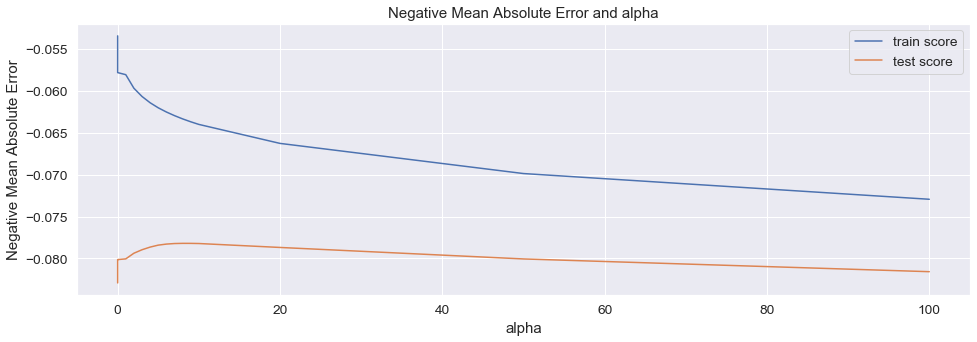

In [61]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')
plt.figure(figsize=(16,5))

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [62]:
#final ridge model
alpha = 10
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 1.06347476e-02,  9.89505000e-03,  0.00000000e+00,  7.89724139e-03,
       -5.16319151e-03,  4.91196817e-04,  0.00000000e+00,  0.00000000e+00,
        6.56852384e-02,  4.04342993e-02,  8.22651158e-03,  1.23199958e-03,
       -1.02337631e-02,  8.29217172e-03, -4.45483318e-03,  8.40830648e-03,
        1.24629706e-02,  2.21903686e-02, -4.04746334e-04,  4.97735846e-03,
        7.01946588e-05,  2.55589024e-02,  1.26808401e-02,  0.00000000e+00,
        2.93062048e-02,  2.12514625e-02,  0.00000000e+00,  4.13598621e-02,
        1.16082408e-02,  5.19832399e-03,  1.87622790e-02,  1.56704437e-02,
        8.01660509e-03,  0.00000000e+00,  1.21127751e-02,  2.35281258e-02,
        1.09517004e-02,  1.60974861e-02,  1.69532526e-04,  5.35705455e-03,
        1.56680161e-02,  2.43598607e-02,  1.55930255e-02, -9.46721183e-03,
        0.00000000e+00,  1.34912722e-02,  8.40922587e-03,  6.68273226e-03,
        0.00000000e+00,  1.47724336e-02,  0.00000000e+00,  0.00000000e+00,
       -7.14028322e-04,  

In [63]:
#lets predict the R-squared value of test and train data
y_train_pred = ridge.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.928378268078816


In [64]:
y_test_pred = ridge.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9143775082868933


In [65]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, y_test_pred))

RMSE is: 
 0.014404390560158995


In [66]:
# Ridge model parameters
model_parameters_1 = list(ridge.coef_)
model_parameters_1.insert(0, ridge.intercept_)
model_parameters_1 = [round(x, 3) for x in model_parameters_1]
cols = X_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters_1))

[('constant', 11.899),
 ('LotFrontage', 0.011),
 ('LotArea', 0.01),
 ('Street', 0.0),
 ('Alley', 0.008),
 ('LotShape', -0.005),
 ('LandContour', 0.0),
 ('Utilities', 0.0),
 ('LandSlope', 0.0),
 ('OverallQual', 0.066),
 ('OverallCond', 0.04),
 ('MasVnrArea', 0.008),
 ('ExterQual', 0.001),
 ('ExterCond', -0.01),
 ('BsmtQual', 0.008),
 ('BsmtCond', -0.004),
 ('BsmtExposure', 0.008),
 ('BsmtFinType1', 0.012),
 ('BsmtFinSF1', 0.022),
 ('BsmtFinType2', -0.0),
 ('BsmtFinSF2', 0.005),
 ('BsmtUnfSF', 0.0),
 ('TotalBsmtSF', 0.026),
 ('HeatingQC', 0.013),
 ('CentralAir', 0.0),
 ('1stFlrSF', 0.029),
 ('2ndFlrSF', 0.021),
 ('LowQualFinSF', 0.0),
 ('GrLivArea', 0.041),
 ('BsmtFullBath', 0.012),
 ('BsmtHalfBath', 0.005),
 ('FullBath', 0.019),
 ('HalfBath', 0.016),
 ('BedroomAbvGr', 0.008),
 ('KitchenAbvGr', 0.0),
 ('KitchenQual', 0.012),
 ('TotRmsAbvGrd', 0.024),
 ('Functional', 0.011),
 ('Fireplaces', 0.016),
 ('FireplaceQu', 0.0),
 ('GarageFinish', 0.005),
 ('GarageCars', 0.016),
 ('GarageArea', 0.

In [67]:
#lasso
params = {'alpha': [0.00005, 0.0001, 0.001, 0.008, 0.01]}
lasso = Lasso()

# cross validation
model_cv_l = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv_l.fit(X_train, y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    1.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [5e-05, 0.0001, 0.001, 0.008, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [68]:
# cv results
cv_results_l = pd.DataFrame(model_cv_l.cv_results_)

In [69]:
#checking the value of optimum number of parameters
print(model_cv_l.best_params_)
print(model_cv_l.best_score_)

{'alpha': 0.001}
-0.07820491263760772


In [70]:
#final lasso model
alpha = 0.001

lasso = Lasso(alpha=alpha)
        
lasso.fit(X_train, y_train) 

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [71]:
#lets predict the R-squared value of test and train data
y_train_pred = lasso.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))

0.9227862279468041


In [72]:
#lets predict the R-squared value of test and train data
y_test_pred = lasso.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9197730226689944


In [73]:
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, y_test_pred))

RMSE is: 
 0.013496695690764733


In [74]:
# Lasso model parameters
model_parameters_1 = list(lasso.coef_)
model_parameters_1.insert(0, lasso.intercept_)
model_parameters_1 = [round(x, 3) for x in model_parameters_1]
cols = X_train.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters_1))

[('constant', 11.965),
 ('LotFrontage', 0.014),
 ('LotArea', 0.014),
 ('Street', 0.0),
 ('Alley', 0.009),
 ('LotShape', -0.004),
 ('LandContour', -0.0),
 ('Utilities', 0.0),
 ('LandSlope', 0.0),
 ('OverallQual', 0.074),
 ('OverallCond', 0.042),
 ('MasVnrArea', 0.008),
 ('ExterQual', 0.002),
 ('ExterCond', -0.009),
 ('BsmtQual', 0.003),
 ('BsmtCond', -0.0),
 ('BsmtExposure', 0.006),
 ('BsmtFinType1', 0.009),
 ('BsmtFinSF1', 0.023),
 ('BsmtFinType2', 0.0),
 ('BsmtFinSF2', 0.005),
 ('BsmtUnfSF', -0.0),
 ('TotalBsmtSF', 0.029),
 ('HeatingQC', 0.015),
 ('CentralAir', 0.0),
 ('1stFlrSF', 0.01),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', 0.0),
 ('GrLivArea', 0.079),
 ('BsmtFullBath', 0.013),
 ('BsmtHalfBath', 0.004),
 ('FullBath', 0.011),
 ('HalfBath', 0.009),
 ('BedroomAbvGr', 0.007),
 ('KitchenAbvGr', 0.0),
 ('KitchenQual', 0.012),
 ('TotRmsAbvGrd', 0.02),
 ('Functional', 0.01),
 ('Fireplaces', 0.016),
 ('FireplaceQu', 0.0),
 ('GarageFinish', 0.007),
 ('GarageCars', 0.014),
 ('GarageArea', 0.022

In [75]:
test_data=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

FileNotFoundError: [Errno 2] File /kaggle/input/house-prices-advanced-regression-techniques/test.csv does not exist: '/kaggle/input/house-prices-advanced-regression-techniques/test.csv'

In [ ]:
test_data.head()

In [ ]:
df_missing=pd.DataFrame((round(100*(test_data.isnull().sum()/len(test_data.index)), 2)), columns=['missing'])
df_missing.sort_values(by=['missing'], ascending=False).head(20)

In [ ]:
#addressing NaN values based on data dictionary

# In column 'PoolQC' (Pool quality), NaN stands for No Pool
test_data['PoolQC'] = test_data['PoolQC'].fillna('No_Pool')

# In column 'MiscFeature' (Miscellaneous Features), NaN stands for None, meaning the house has no miscellaneous features.
test_data['MiscFeature'] = test_data['MiscFeature'].fillna('None')

# In column 'Alley', NaN stands for No Alley Access as per the data dictionary
test_data['Alley'] = test_data['Alley'].fillna('No_Alley_Access')

# In column 'Fence' (Fence Quality), NaN stands for No Fence as per the data dictionary
test_data['Fence'] = test_data['Fence'].fillna('No_Fence')

# In column 'FireplaceQu' (FireplaceQu Quality), NaN stands for No Fireplace as per the data dictionary
test_data['FireplaceQu'] = test_data['FireplaceQu'].fillna('No_Fireplace')

# LotFrontage stands for Linear feet of street connected to property, there is no explanation to impute this in data dictionary
# Let's consider imputing it with median of the lotFrontage of houses in the same neighbourhood

# Group data by neighborhood and impute missing value with median LotFrontage of all the neighborhood
test_data["LotFrontage"] = test_data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

# In column 'GarageYrBlt' (Gargae Year Built), NaN stands for houses with no garage, let's impute with 0
test_data['GarageYrBlt'] = test_data['GarageYrBlt'].fillna(0)

# 'GarageType', 'GarageFinish', 'GarageQual' (Garage Quality) and 'GarageCond'(Garage Condition)
# Missing values signify no garage as per data dictionary.let's impute NaN values here with No Garage
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    test_data[col] = test_data[col].fillna('No_Garage')

#BsmtFinType1, BsmtFinType2 (Rating of basement finished area),
#BsmtExposure (Basement Exposure), BsmtQual(Basement Quality), BsmtCond (Basement Conidtion)
#These are all parameter related to basement. A NaN value probably signifies that the house does not have a basement.
for col in ('BsmtFinType1', 'BsmtFinType2', 'BsmtExposure', 'BsmtQual','BsmtCond'):
    test_data[col] = test_data[col].fillna('No_Basement')
    
# In column 'MasVnrType' (Masonry veneer type), let's impute it with mode "None"
test_data['MasVnrType'] = test_data['MasVnrType'].fillna('None')

# In column 'MasVnrType' (Masonry veneer type), let's impute it with mode 0 corresponding to None
test_data['MasVnrArea'] = test_data['MasVnrArea'].fillna(0)

# In column 'Electrical' (Electrical system), let's impute NaN with "Other"
test_data['Electrical'] = test_data['Electrical'].fillna("Other")

In [ ]:
df_missing=pd.DataFrame((round(100*(test_data.isnull().sum()/len(test_data.index)), 2)), columns=['missing'])
df_missing.sort_values(by=['missing'], ascending=False).head(20)

In [ ]:
catgl_feats = test_data.dtypes[test_data.dtypes == 'object'].index
numrl_feats = test_data.dtypes[test_data.dtypes != 'object'].index

In [ ]:
Nan_cols = []

cols = test_data.columns
for i in cols:
    if (test_data[i].isnull().sum()/len(df))*100 > 0:
        Nan_cols.append(i)

In [ ]:
cat_treat_list = []
num_treat_list = []

for i in Nan_cols:
    if i in catgl_feats:
        cat_treat_list.append(i)
    else:
        num_treat_list.append(i)

In [ ]:
cat_treat_list

In [ ]:
num_treat_list

In [ ]:
for i in cat_treat_list:
    test_data[i].fillna(test_data[i].mode()[0], inplace = True)

In [ ]:
for i in num_treat_list:
    test_data[i].fillna(0, inplace = True)

In [ ]:
df_missing=pd.DataFrame((round(100*(test_data.isnull().sum()/len(test_data.index)), 2)), columns=['missing'])
df_missing.sort_values(by=['missing'], ascending=False).head(20)

In [ ]:
# label encode ordinal features where there is order in categories

test_data = test_data.replace({  "Alley":        {"No_Alley_Access" : 0, "Grvl" : 1, "Pave" : 2},
                       "BsmtCond":     {"No_Basement" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "BsmtExposure": {"No_Basement" : 0, "No" : 2, "Mn" : 2, "Av": 3, 
                                        "Gd" : 4},
                       "BsmtFinType1": {"No_Basement" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, 
                                        "BLQ" : 4, "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2": {"No_Basement" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, 
                                        "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual":     {"No_Basement" : 0, "Po" : 1, "Fa" : 2, "TA": 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "CentralAir":   {"None" : 0, "N" : 1, "Y" : 2},
                       "ExterCond":    {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, 
                                        "Gd": 4, "Ex" : 5},
                       "ExterQual":    {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, 
                                        "Gd": 4, "Ex" : 5},
                       "Fence":        {"No_Fence" : 0, "MnWw" : 1, "GdWo" : 2, "MnPrv": 3, 
                                        "GdPrv" : 4},
                       "FireplaceQu":  {"No_Fireplace" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "Functional":   {"None" : 0, "Sal" : 1, "Sev" : 2, "Maj2" : 3, 
                                        "Maj1" : 4, "Mod": 5, "Min2" : 6, "Min1" : 7, 
                                        "Typ" : 8},
                       "GarageCond":   {"No_Garage" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "GarageQual":   {"No_Garage" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "GarageFinish": {"No_Garage" : 0, "Unf" : 1, "RFn" : 2, "Fin" : 3},
                       "HeatingQC":    {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "KitchenQual":  {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, 
                                        "Gd" : 4, "Ex" : 5},
                       "LandContour":  {"None" : 0, "Low" : 1, "HLS" : 2, "Bnk" : 3, 
                                        "Lvl" : 4},
                       "LandSlope":    {"None" : 0, "Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape":     {"None" : 0, "IR3" : 1, "IR2" : 2, "IR1" : 3, 
                                        "Reg" : 4},
                       "PavedDrive":   {"None" : 0, "N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC":       {"No_Pool" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, 
                                        "Ex" : 4},
                       "Street":       {"None" : 0, "Grvl" : 1, "Pave" : 2},
                       "Utilities":    {"None" : 0, "ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, 
                                        "AllPub" : 4}}
                     )

test_data.BsmtCond = test_data.BsmtCond.astype(int)

In [ ]:
test_data.GarageQual = test_data.GarageQual.astype(int)

In [ ]:
## "MSSubClass" is a numeric column but it should actually be categorical as per the data dictionary, so let's convert that.

test_data=test_data.replace({'MSSubClass' : { 20 : '1-STORY 1946 & NEWER ALL STYLES', 
                                          30:'1-STORY 1945 & OLDER',
                                          40:'1-STORY W/FINISHED ATTIC ALL AGES',
                                          45:'1-1/2 STORY - UNFINISHED ALL AGES',
                                          50:'1-1/2 STORY FINISHED ALL AGES',
                                          60:'2-STORY 1946 & NEWER',
                                          70:'2-STORY 1945 & OLDER',
                                          75:'2-1/2 STORY ALL AGES',
                                          80:'SPLIT OR MULTI-LEVEL',
                                          85:'SPLIT FOYER',
                                          90:'DUPLEX - ALL STYLES AND AGES',
                                         120:'1-STORY PUD (Planned Unit Development) - 1946 & NEWER',
                                         150:'1-1/2 STORY PUD - ALL AGES',
                                         160:'2-STORY PUD - 1946 & NEWER',
                                         180:'PUD - MULTILEVEL - INCL SPLIT LEV/FOYER',
                                         190:'2 FAMILY CONVERSION - ALL STYLES AND AGES'}})

In [ ]:
#changing months to categorical
import calendar

test_data['MonthSold'] = test_data['MoSold'].apply(lambda x: calendar.month_name[x])
test_data=test_data.drop(['MoSold'], axis=1)

In [ ]:
#changing data type of Gararge yr built to int from float
test_data['GarageYrBlt'] = test_data['GarageYrBlt'].astype(int)

In [ ]:
#DERIVED VARIABLES which might make more sense than year

test_data['Age'] = test_data['YrSold'] - test_data['YearBuilt']
test_data['Remod_Age'] = test_data['YrSold'] - test_data['YearRemodAdd']
test_data['Garage_Age'] = test_data['YrSold'] - test_data['GarageYrBlt']
test_data.drop(['YearBuilt','YearRemodAdd','GarageYrBlt','YrSold'],1, inplace = True)

In [ ]:
#converting binary variables to numeric by mapping to 0 and 1

test_data['Street'] = test_data['Street'].apply(lambda x: 1 if x == 'Pave' else 0 )
test_data['CentralAir'] = test_data['CentralAir'].apply(lambda x : 1 if x == 'Y' else 0)

In [ ]:
#converting binary variables to numeric by mapping to 0 and 1

test_data['PavedDrive'] = test_data['PavedDrive'].apply(lambda x : 1 if x == 'Y' else 0)

In [ ]:
test_data_X=test_data.drop('Id',1)

In [ ]:
test_data_numerical=test_data_X.select_dtypes(include=['int32','int64','float64']).columns

In [ ]:
test_data_numerical

In [ ]:
test_data_categorical = test_data_X.select_dtypes(include=['object'])
test_data_categorical.head()

In [ ]:
# convert into dummies
test_data_dummies = pd.get_dummies(test_data_categorical, drop_first=True)
test_data_dummies.head()

In [ ]:
#dropping original categorical columns
df_test = test_data_X.drop(list(test_data_categorical.columns), axis=1)

In [ ]:
#concatenating dummy columns to original dataframe
df = pd.concat([df_test,test_data_dummies], axis=1)

In [ ]:
df[test_data_numerical].shape

In [ ]:
df[test_data_numerical] = scaler.transform(df[test_data_numerical])

In [ ]:
#lets predict the R-squared value of test and train data
y_test_predicted = lasso.predict(df)

In [ ]:
y_test_predicted

In [ ]:
final_predictions = np.exp(y_test_predicted)

In [ ]:
final_predictions

In [ ]:
salespriceprediction= pd.DataFrame({'Id': test_data['Id'] ,'SalePrice': final_predictions })

In [ ]:
salespriceprediction.to_csv("salespriceprediction.csv",index=False)